#Lección 3: Modelos de Clasificación

Autor: Jorge Castro

## Tipos de Clasificación

Los modelos de **clasificación** buscan predecir una **etiqueta** de clase discreta a partir de variables de entrada discretas o continuas. 

Si contamos con solo 2 clases se dice que es un problema de **clasificación binaria**.  Por ejemplo, si quisiéramos diagnosticar cáncer a partir de imágenes microscópicas de tejidos, o si quisiéramos identificar el género de una persona a partir de una grabación de audio.

![](https://drive.google.com/uc?export=view&id=1oyjGmvsWd9bXwlg_jwo7PZl_ZXAlGHWQ)

![](https://drive.google.com/uc?export=view&id=11aO6Fg7d2M0jdDIHkc71gem2Dqz3oGpQ)

Si contamos con más de 2 clases se dice que es un problema de **clasificación multiclase**. Por ejemplo, si quisiéramos detectar diferentes especies de plantas usando fotos de sus hojas.  O si quisiéramos detectar el lenguaje de un texto.

![](https://drive.google.com/uc?export=view&id=1yFFHfyLMEe-Uxv2sO-oph3QLU-rK99Kf)

![](https://drive.google.com/uc?export=view&id=1shqo3y7Nvpyyi5f15g7NTwgWgFkSm5e9)

Cuando a cada muestra de entrenamiento se le pueden asignar 2 o más clases se dice que es un problema de **clasificación multi-etiqueta**. Por ejemplo, si quisiéramos detectar las diferentes especies de pájaros vocalizando en una grabación de audio.

![](https://drive.google.com/uc?export=view&id=1gDSdMD7M25o_3tRONFPh_ddrOd3apOrz)




**QUIZ DE IDENTIFICACIÓN DEL TIPO DE PROBLEMA**

Si quisiéramos predecir el comportamiento de la bolsa de valores o el crecimiento de una compañía a partir de datos históricos de las mismas estaríamos ante un problema de:

- Regresión
- Clasificación binaria
- Clasificación multiclase
- ninguna de las anteriores

Si quisieramos desarrollar un modelo para detectar transacciones bancarias fraudulentas, este resolvería una tarea de:

- Regresión
- Clasificación binaria
- Clasificación multiclase
- Clasificación multi-etiqueta

Si quisieramos desarrollar un modelo para identificar la presencia de peatones y automoviles en imágenes de video tomadas en una ciudad, estaríamos ante un problema de:

- Regresión
- Clasificación binaria
- Clasificación multiclase
- Clasificación multi-etiqueta

Supongamos que queremos desarrollar un modelo de clasificación para predecir si un tumor es benigno  o maligno a partir del tamaño del mismo. En este caso la variable que intentamos predecir $y$ puede tomar únicamente dos valores:

0: Clase Negativa (tumor benigno) 

1: Clase Positiva (tumor maligno)

Partiendo de los siguientes datos: 

![](https://drive.google.com/uc?export=view&id=1BR9WJ8x69Bo1-BbcRxzbnOwQpYSK13Sa)


podríamos pensar en ajustar un modelo de regresión lineal y redondear su salida $y_r$ a 0 o 1 para predecir si el tumor es benigno ($y=0$) o maligno ($y=1$), de forma que:

si $y_r \ge 0.5$, entonces $y=1$

si $y_r < 0.5$, entonces $y=0$


**QUIZ REGRESIÓN LINEAL PARA CLASIFICACIÓN**

Caso #1

![](https://drive.google.com/uc?export=view&id=14V3mgpNwmM54Y4_n5DIX1UsRdIhGjo6O)

Pareciera que pare este set en particular el modeo de regresión podría funcionar bien, sin embargo, suponiendo que obtenemos dos nuevas observaciones para nuestro set de datos ¿Qué ocurriría al intentar ajustar nuevamente un modelo de regresión?

- El modelo clasificaría de forma errónea algunas observaciones
- El modelo tomaría valores fuera del intervalo de 0 a 1
- La 1 y la 2
- Ningún problema

Caso #2

![](https://drive.google.com/uc?export=view&id=1tTMHt1OECufAPWGL7VXRK_MFygsMFeML)

Caso #3

![](https://drive.google.com/uc?export=view&id=1OIRNtvdVKagtAdP_HUSkAG_s0WrFBCF7)

## Regresión logística

La regresión logística es uno de los modelos de clasificación más simples y ampliamente usados. A través de la regresión logística se obtiene un **límite de decisión** (decision boundary) para separar distintas clases. Por ejemplo, si quisiéramos obtener un modelo para clasificar manzanas y limones de acuerdo a su anchura y altura, entonces partiendo de los siguientes datos:






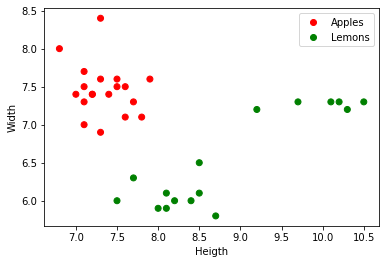

In [1]:
import pandas as pd #biblioteca para lectura de datos estructurados y su manipulación
import numpy as np  #biblioteca para realizar operaciones con vectores y matrices 
import matplotlib.pyplot as plt #biblioteca para visual ización de datos

ds = pd.read_csv('../Datasets/fruits.csv',header=0)

#Seleccionar solo manzanas y limones
ds = ds.loc[(ds['fruit_name'] == 'apple') | (ds['fruit_name'] == 'lemon')]

#Visualización de los datos
colors = {'apple':'red', 'mandarin':'gold', 'lemon':'green', 'orange':'orange'}
plt.scatter(ds['height'], ds['width'], c=ds['fruit_name'].map(colors), label=ds['fruit_name'].map(colors))

#Ejes y leyendas
plt.xlabel('Heigth')
plt.ylabel('Width')
handlelist = [plt.plot([], marker="o", ls="", color=color)[0] for color in ['red','green']]
plt.legend(handlelist,['Apples','Lemons'])
plt.show()

la regresión logística busca la ecuación de la línea que mejor separe las clases (manzanas y limones):

In [2]:
from sklearn.linear_model import LogisticRegression
logRegBin = LogisticRegression()

x = ds[['height','width']].values
y = ds[['fruit_name']].values
logRegBin = logRegBin.fit(x, y[:,0])

![](https://drive.google.com/uc?export=view&id=1rOScFGR1FKvEzBkC_UOgDtn7l5VZYBl9)




Por ejemplo si obtuviesemos una nueva fruta con 9 cm de altura y 7 cm de ancho debería clasificarse como un limón:

In [3]:
print(logRegBin.predict([[9,7]]))

['lemon']


De igual forma si obtenemos una nueva fruta con 7 cm de altura y 8 cm de ancho debería clasificarse como una manzana:

In [4]:
print(logRegBin.predict([[7,8]]))

['apple']


No obstante como este segundo punto está más alejado del límite de decisión deberíamos ver que la probabilidad de pertenencia a su respectiva clase (clase 0 o clase negativa = clase manzana) es más alta que la del primer punto con respecto a su clase (clase 1 o clase positiva = clase limón) 

In [5]:
print('Probabilidad de pertenencia del primer punto a clase limón:', logRegBin.predict_proba([[9,7]])[0][1])
print('Probabilidad de pertenencia del segundo punto a clase manzana:', logRegBin.predict_proba([[7,8]])[0][0])

#print(logRegBin.classes_) #Observar orden de asignación de clases

Probabilidad de pertenencia del primer punto a clase limón: 0.8156289973900623
Probabilidad de pertenencia del segundo punto a clase manzana: 0.9827032544525907


## Medición del desempeño de un modelo de clasificación

Existen muchas métricas o formas de evaluar la bondad de un modelo predictivo de clasificación, pero tal vez la más común es la **exactitud** (accuracy). La exactitud de clasificación es el porcentaje de ejemplos correctamente clasificados del total de predicciones hechas. Matemáticamente, se puede definir a partir de:

- **Verdaderos positivos (VP)**: observaciones clasificadas correctamente como pertenecientes a la clase positiva.
- **Verdaderos negativos (VN)**: observaciones clasificadas correctamente como pertenecientes a la clase negativa 
- **Falsos positivos (FP)**: observaciones clasificadas erróneamente como pertenecientes a la clase positiva.
- **Falsos negativos (FN)**: observaciones clasificadas erróneamente como pertenecientes a la clase negativa.

como:

$\frac{VP + VN}{VP + VN + FP + FN}$

En otras palabras, cantidad de predicciones correctas entre cantidad de predicciones realizadas.

In [6]:
print('Exactitud del modelo de regresión logística para dos frutas:',logRegBin.score(x, y))

Exactitud del modelo de regresión logística para dos frutas: 1.0


## Clasificación multiclase

Suponiendo que quisiéramos clasificar múltiples frutas en vez de dos (clasificación multiclase); por ejemplo, manzanas, limones, mandarinas y naranjas:

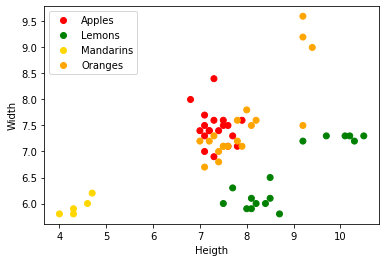

In [7]:
import pandas as pd #biblioteca para lectura de datos estructurados y su manipulación
import numpy as np  #biblioteca para realizar operaciones con vectores y matrices 
import matplotlib.pyplot as plt #biblioteca para visual ización de datos

ds = pd.read_csv('../Datasets/fruits.csv',header=0)

#Visualización de los datos
colors = {'apple':'red', 'mandarin':'gold', 'lemon':'green', 'orange':'orange'}
plt.scatter(ds['height'], ds['width'], c=ds['fruit_name'].map(colors), label=ds['fruit_name'].map(colors))

#Ejes y leyendas
plt.xlabel('Heigth')
plt.ylabel('Width')
handlelist = [plt.plot([], marker="o", ls="", color=color)[0] for color in ['red','green','gold','orange']]
plt.legend(handlelist,['Apples','Lemons','Mandarins','Oranges'])
plt.show()

deberíamos obtener múltiples límites de decisión para separar las diferentes clases (frutas). Un enfoque común para realizar esta tarea se conoce como **regresión logística de uno contra el resto** (one vs all) y consiste en aplicar una regresión logistica binaria a cada clase con respecto al resto de clases.

![](https://drive.google.com/uc?export=view&id=1QVo0eZ2igPQXdIymxzpWqlXroSgCMh4l)



En la función *LogisticRegression()* podemos escoger el enfoque de uno contra el resto para hacer clasificación multiclase estableciendo el parámetro *multi_class='ovr'*. También podemos seleccionar otro enfoque más avanzado llamado regresión multinomial estableciendo *multi_class='multinomial'*. 

In [8]:
import pandas as pd 
import numpy as np  
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression

#Grafico regresion logistica para 4 frutas
ds = pd.read_csv('../Datasets/fruits.csv',header=0)
colors = {'apple':'red', 'mandarin':'gold', 'lemon':'green', 'orange':'orange'}


x = ds[['height','width']].values
y = ds[['fruit_name']].values

logregOvr = LogisticRegression(multi_class='ovr')
logregOvr = logregOvr.fit(x, np.ravel(y))

![](https://drive.google.com/uc?export=view&id=10f7MP7FHplYOqzh_CbcPzdKDbXLY4bPK)

In [9]:
logregMultinom = LogisticRegression(multi_class='multinomial')
logregMultinom = logregMultinom.fit(x, np.ravel(y))

/home/plasmallan/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


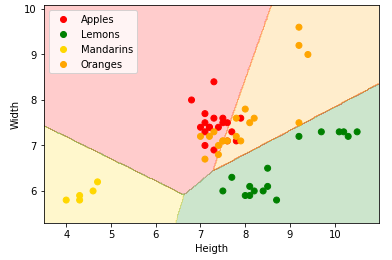![](https://drive.google.com/uc?export=view&id=1Ol1K0unhfDhC6KBa0n5KqCEWV71BtNCm)

Los dos modelos de regresión logística anteriores realizan una clasificación muy similar a simple vista, pero ¿cómo podemos compararlos más objetivamente, en especial cuando se tiene cantidades muy grandes de datos o cuando se usan mucho más de dos predictores?

In [10]:
print('Exactitud del modelo de regresión logística usando uno contra el resto:', logregOvr.score(x, y))
print('Exactitud del modelo de regresión logística usando la opción multinomial:', logregMultinom.score(x, y))

Exactitud del modelo de regresión logística usando uno contra el resto: 0.7796610169491526
Exactitud del modelo de regresión logística usando la opción multinomial: 0.7966101694915254


## Matriz de confusión

La matriz de confusión $M$ nos permite entender con mayor detalle los errores de clasificación que se están cometiendo para cada clase $\vec{c}_i$ perteneciente al vector de clases $\vec{c}$. $M$ presenta $|\vec{c}|$ filas y $|\vec{c}|$ columnas donde $|\vec{c}|$ es la cantidad de clases. La entrada $M_{i,j}$ indica la cantidad de observaciones de la clase $\vec{c}_i$ que fueron clasificadas como clase $\vec{c}_j$. De esta forma, si $i=j$, $M_{i,j}$ indica la cantidad de **verdaderos positivos** obtenidos para la clase $i$. Asimismo, si $i \neq j$, $M_{i,j}$ indica la cantidad de observaciones de la clase $i$ que fueron erróneamente clasificadas como clase $j$. 

Por lo tanto, si sumamos todas las entradas $M_{i,j}$ de la fila $i$ en donde $i \neq j$ obtenemos el total de **falsos negativos** para la clase $\vec{c}_i$ y si sumamos todas las entradas $M_{i,j}$ de la columna $j$ en donde $i \neq j$ obtenemos el total de **falsos positivos** para la clase $\vec{c}_j$. Los **verdaderos negativos** para cualquier clase $\vec{c}_k$ se pueden obtener sumando todas las entradas de la matriz $M_{i,j}$ tal que $i \neq k$ y $j \neq k$. En síntesis, las filas de una matriz de confusión hacen referencia a las verdaderas clases de cada observación y las columnas a las predicciones hechas por el clasificador.

In [11]:
#Obtención de la matriz de confusión usando el paquete metrics de la biblioteca sklearn
from sklearn import metrics

#Impresión básica en pantalla
predOvr = logregOvr.predict(x)
cm = metrics.confusion_matrix(y, predOvr)
print(cm)

#Impresión OVR con nombres de filas y columnas
# dfcm = pd.DataFrame(cm)
# dfcm.columns =logregOvr.classes_ 
# dfcm.index =logregOvr.classes_ 
# print(dfcm)

#Impresión Multinomial con nombres de filas y columnas
# predMultinom = logregMultinom.predict(x)
# cm2 = metrics.confusion_matrix(y, predMultinom)
# dfcm2 = pd.DataFrame(cm2)
# dfcm2.columns =logregMultinom.classes_ 
# dfcm2.index =logregMultinom.classes_ 
# print(dfcm2)

[[15  0  0  4]
 [ 0 16  0  0]
 [ 0  0  5  0]
 [ 8  1  0 10]]


**QUIZ DESEMPEÑO DE MODELOS DE CLASIFICACIÓN**

¿Si quisiera comparar el desempeño de dos clasificadores para la tarea de predecir $y$ usando los predictores $a$,$b$,$c$ y $d$ cuál sería la mejor o mejores opciones?
- Generar un gráfico con limites de decisión
- Generar una matriz de confusión
- Obtener la exactitud de ambos
- Obtener el $R^2$ de ambos
- La 2 y la 3
- La 1 y la 3

Supongamos que desarrollamos un modelo de clasificación para predecir si un tumor es benigno o maligno basándonos en cinco variables independientes con valores continuos. Tomando en cuenta que los falsos negativos (diagnosticar un tumor como benigno cuando en realidad es maligno) son mucho menos deseables que los falsos positivos ¿Cuál sería la mejor forma de medir el desempeño del modelo de acuerdo a lo que hemos estudiado hasta el momento?

- Generar una matriz de confusión
- Obtener la exactitud del modelo
- Generar un gráfico con los limites de decisión
- Obtener el $R^2$ del modelo




## Regresión logística polinomial

Al igual que con los modelos de regresión, podemos aumentar la complejidad del modelo de regresión logística para aumentar su desempeño en la clasificación. De esta forma, los límites de decisión a obtener pueden ser más flexibles que simples líneas.

In [12]:
#Regresión polinomial
from sklearn.preprocessing import PolynomialFeatures

#Transformación de la entrada al grado del polinomio de interés
grado = 2
x_pol = PolynomialFeatures(degree=grado, include_bias=False).fit_transform(x)
#print(x_pol) #nueva entrada

#logregPol = LogisticRegression() #max_iter= 100 -800
#logregPol = logregPol.fit(x_pol, np.ravel(y))
#print('Exactitud del modelo de regresión logística polinomial de grado %d:' % grado, logregPol.score(x_pol, y))

![](https://drive.google.com/uc?export=view&id=116c0aAQ5alGql4BO7YenAAWFk1sp65zo)


![](https://drive.google.com/uc?export=view&id=1Z3po9dgzPpayyy_EiRwr5nJWy2zC1xz8)

## Notas finales sobre modelos de clasificación

1. Es importante destacar que en un problema de clasificación las entradas pueden ser continuas, discretas o categóricas pero la variable de respuesta es categórica.
2. Dependiendo de la cantidad de categorías (clases) un problema de clasificación se puede considerar binario (2 clases) o multiclase (más de 2 clases). Si varias clases pueden ocurrir simultáneamente para una misma observación se dice que es un problema de clasificación multi-etiqueta
3. La regresión logística es un algoritmo de clasificación y no de regresión a pesar de que contiene la palabra "regresión" en su nombre.
4. Los coeficientes de la regresión logística se pueden obtener a través del algoritmo de optimización de **gradientes descendientes** u otras técnicas de optimización más avanzadas como **gradientes conjugados**, **BFGS** y **L-BFGS**.
5. Para medir el desempeño de un algoritmo de clasificación podemos usar la **exactitud** (accuracy) que nos brinda el porcentaje de observaciones que fueron correctamente clasificadas. Para obtener información más detallada sobre el desempeño del clasificador (especialmente cuando se tienen múltiples clases) se puede obtener la **matriz de confusión** que indica en cuáles clases se cometieron los errores y que tipos de errores fueron (falsos negativos o falsos positivos)
6. Al igual que los modelos de regresión los modelos de clasificación pueden sufrir del problema de **sobreajuste** cuando se aumenta mucho la complejidad de los mismo y/o se entrenan por demasiadas iteraciones.

Existen otros modelos de clasificación más complejos como:
1. Algoritmo del vecino más cercano (NN)
2. Máquinas de soporte vectorial (SVM)
3. Árboles de decisión
4. Bosques aleatorios (Random Forest)
5. Redes Neuronales profundas (DNN)

## Los k-ésimos vecinos más cercanos

Busca los puntos más cercanos a la hora de predecir o clasificar un nuevo dato.

Se considera como caso elemental el cálculo a partir de un vecino cercano. Si es más de un vecino, se utiliza la regla del voto, que es un conteo de la cantidad de vecinos cercanos pertenecientes a una clase, o relativos a un valor dada una predicción.

In [13]:
# kNN para clasificación
from sklearn.neighbors import KNeighborsClassifier

# Clasificador para el k-ésimo vecino más cercano
n_neighbors=2
neigh_Bin=KNeighborsClassifier(n_neighbors=n_neighbors)

# Seleccionar solo manzanas y limones
ds=pd.read_csv('../Datasets/fruits.csv',header=0)
x=ds[['height','width']].values
y=ds[['fruit_name']].values

Ahora, con el clasificador multi-clase con el método de kNN's

In [14]:
ds=pd.read_csv('../Datasets/fruits.csv',header=0)
x=ds[['height','width']].values
y=ds[['fruit_name']].values

# Clasificador del k-ésimo vecino más cercano
n_neighbors=4
neighMulti=KNeighborsClassifier(n_neighbors=n_neighbors)
neighMulti=neighMulti.fit(x,np.ravel(y))
print('Training Accuracy: {}'.format(neighMulti.score(x,np.ravel(y))))

Training Accuracy: 0.8305084745762712


In [15]:
from sklearn.metrics import confusion_matrix
predNN=neighMulti.predict(x)
cm=confusion_matrix(y,predNN)
dfcm=pd.DataFrame(cm)
dfcm.columns=neighMulti.classes_
dfcm.index=neighMulti.classes_
print(dfcm)

          apple  lemon  mandarin  orange
apple        17      0         0       2
lemon         0     16         0       0
mandarin      0      0         5       0
orange        7      1         0      11


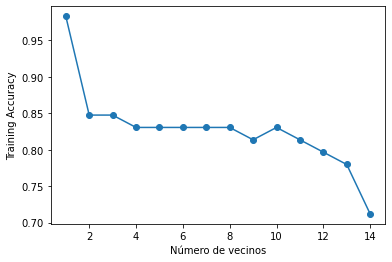

In [16]:
# Entrenamiento de kNN
accs=[]

# Calcular la precisión del modelo usando entre 1 y 15 vecinos
for k in range(1,15):
    neighMulti=KNeighborsClassifier(n_neighbors=k)
    neighMulti=neighMulti.fit(x,np.ravel(y))
    accs.append(neighMulti.score(x,np.ravel(y)))
    
plt.plot(list(range(1,15)),accs,marker='o')
plt.xlabel('Número de vecinos')
plt.ylabel('Training Accuracy')
plt.show()

In [17]:
from sklearn import svm

# Creal el clasificador de vector de soporte
svcMulti=svm.SVC(degree=2,C=5) # controla el grado de regularización
svcMulti=svcMulti.fit(x,np.ravel(y))

# Determinar el puntaje de accuracy (precisión o exactitud)
acc=svcMulti.score(x,np.ravel(y))
print('Acc SVM as multi-class classifier: {}'.format(acc))

Acc SVM as multi-class classifier: 0.8135593220338984


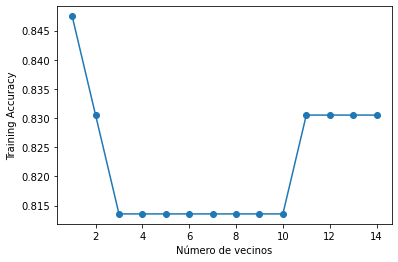

In [18]:
# Entrenamiento de SVC
accs=[]

# Calcular la precisión del modelo usando un C entre 1 y 15
for C in range(1,15):
    svcMulti=svm.SVC(degree=2,C=C)
    svcMulti=svcMulti.fit(x,np.ravel(y))
    accs.append(svcMulti.score(x,np.ravel(y)))
    
plt.plot(list(range(1,15)),accs,marker='o')
plt.xlabel('Número de vecinos')
plt.ylabel('Training Accuracy')
plt.show()

## Práctica para la casa #2
Usando el dataset *obesity_train.csv* y guiándose con la descripción de sus variables en el archivo *obesity_description.txt*:
1. Obtenga un modelo de clasificación que estime el grado de obesidad de una persona (*NObeyesdad*) basado únicamente en atributos de su hábitos de alimentación. Luego, imprima en pantalla la exactitud del modelo.
2. Obtenga un segundo modelo que estime el grado de obesidad de una persona basado únicamente en atributos relacionados con su condición física. Luego, imprima en pantalla la exactitud del modelo.
3. ¿Cual de los dos modelos logra predecir con mayor exactitud el grado de obesidad de una persona? 
4. Imprima en pantalla la matriz de confusión para ambos modelos y responda: ¿Cúal es la categoría de obesidad que presentó más falsos negativos para cada modelo? ¿Cúal es la categoría de obesidad que presentó más falsos positivos para cada modelo?
5. Opcional ¿Cuál fue la categoría que obtuvo una mayor exactitud para cada modelo?

In [19]:
# Puede realizar su práctica aquí

df=pd.read_csv("../Datasets/obesity_train.csv")

In [20]:
df.head()

Gender        Age    Height      Weight family_history_with_overweight  \
0  Female  20.254534  1.569480   41.324558                             no   
1    Male  36.542885  1.750000  119.434645                            yes   
2  Female  26.000000  1.624134  111.531208                            yes   
3    Male  22.200779  1.769328  105.000576                            yes   
4    Male  17.120699  1.809251   58.968994                            yes   

  FAVC      FCVC  NCP        CAEC SMOKE      CH2O SCC       FAF       TUE  \
0  yes  2.392665  1.0  Frequently    no  1.000000  no  0.000000  0.738269   
1  yes  2.729890  3.0   Sometimes    no  2.030084  no  0.592607  0.754417   
2  yes  3.000000  3.0   Sometimes    no  2.609188  no  0.000000  0.174030   
3  yes  2.685484  3.0   Sometimes    no  2.649459  no  1.000000  0.000000   
4  yes  2.524428  4.0   Sometimes    no  2.000000  no  2.000000  0.038380   

        CALC                 MTRANS           NObeyesdad  
0  Sometimes  Public_Transportation  Insufficient_Weight  
1  Sometimes             Automobile      Obesity_Type_II  
2  Sometimes  Public_Transportation     Obesity_Type_III  
3  Sometimes  Public_Transportation       Obesity_Type_I  
4         no             Automobile  Insufficient_Weight

In [21]:
x = df[['FCVC','CH2O']].values
y = df[['NObeyesdad']].values

logregOvr = LogisticRegression(multi_class='ovr')
logregOvr = logregOvr.fit(x, np.ravel(y))
logregMultinom = LogisticRegression(multi_class='multinomial')
logregMultinom = logregMultinom.fit(x, np.ravel(y))
print('Exactitud del modelo de regresión logística usando uno contra el resto:', logregOvr.score(x, y))
print('Exactitud del modelo de regresión logística usando la opción multinomial:', logregMultinom.score(x, y))

Exactitud del modelo de regresión logística usando uno contra el resto: 0.30864928909952605
Exactitud del modelo de regresión logística usando la opción multinomial: 0.3068720379146919


In [22]:
predMultinom = logregMultinom.predict(x)
cm1 = metrics.confusion_matrix(y, predMultinom)
predOvr = logregOvr.predict(x)
cm2 = metrics.confusion_matrix(y, predOvr)
print(cm1,'\n',cm2)

[[ 31  15  82   6  87   0   0]
 [  0  31 103   0  92   0   0]
 [ 16  29 189   9  42   0   0]
 [ 53   8 115   8  46   0   0]
 [  0   0   0   0 259   0   0]
 [ 11  29 136   6  53   0   0]
 [ 16  21 145   6  44   0   0]] 
 [[ 31  13  86   4  87   0   0]
 [  0  31 103   0  92   0   0]
 [ 14  27 191  10  43   0   0]
 [ 48   7 115   9  51   0   0]
 [  0   0   0   0 259   0   0]
 [ 12  28 135   5  55   0   0]
 [ 15  21 144   4  48   0   0]]


In [28]:
x_cat=pd.get_dummies(df[['CALC']])
x_num=df[['TUE','FAF']]
x = pd.concat([x_cat.reset_index(drop=True),x_num],axis=1).values
y = df[['NObeyesdad']].values

logregOvr = LogisticRegression(multi_class='ovr')
logregOvr = logregOvr.fit(x, np.ravel(y))
logregMultinom = LogisticRegression(multi_class='multinomial')
logregMultinom = logregMultinom.fit(x, np.ravel(y))
print('Exactitud del modelo de regresión logística usando uno contra el resto:', logregOvr.score(x, y))
print('Exactitud del modelo de regresión logística usando la opción multinomial:', logregMultinom.score(x, y))

Exactitud del modelo de regresión logística usando uno contra el resto: 0.2517772511848341
Exactitud del modelo de regresión logística usando la opción multinomial: 0.2476303317535545


In [24]:
predMultinom = logregMultinom.predict(x)
cm1 = metrics.confusion_matrix(y, predMultinom)
predOvr = logregOvr.predict(x)
cm2 = metrics.confusion_matrix(y, predOvr)
print(cm1,'\n',cm2)

[[ 64  23  38  26  63   7   0]
 [ 43  30  39  48  54  12   0]
 [ 51  14  53  50 115   2   0]
 [  4   2  86  73  64   1   0]
 [ 14   0  97   0 148   0   0]
 [ 19  31  41  53  66  25   0]
 [ 37  13  72  28  80   2   0]] 
 [[ 63  21  40  26  64   7   0]
 [ 43  30  39  48  54  12   0]
 [ 52  14  53  49 115   2   0]
 [  4   1  88  72  64   1   0]
 [  6   0 104   0 149   0   0]
 [ 18  29  43  53  67  25   0]
 [ 36  13  73  28  80   2   0]]


# Apéndice


### Principales áreas de aplicación del aprendizaje automático (ML):

- **Procesamiento del lenguaje natural** (NLP): subcampo de la lingüística, ciencia computacional, informática e inteligencia artificial que estudia la interacción entre las computadoras y los lenguajes humanos naturales. Algunos de los retos de esta área involucran el reconocimiento del habla, reconocimiento de la escritura, entendimiento del lenguaje natural y generación de lenguaje natural. Algunas aplicaciones famosas del NLP son:
  - Google Speech Recognition
  - Cortana de Microsoft
  - Alexa de Amazon
  - Grammarly


- **Visión por computador** (CV): área cientifica interdisciplinaria que estudia cómo las computadoras pueden obtener un entendimiento de alto nivel a partir de imágenes digitales y videos. Entre los principales retos en esta área están la detección de objetos, rastreo en videos, detección de eventos, reconstrucción de escenas y restauración de imágenes. Algunas aplicaciones famosas de la CV son:
  - Vehículos autónomos
  - Búsqueda de artículos con fotos
  - Tecnología de reconocimiento facial (China)


- **Sistemas de recomendación** (RS): son sistemas de filtrado de información que permiten predecir el nivel de preferencia que un usuario daría a un artículo. Algunas de las empresas más conocidas que usan RS son:
  - Spotify
  - Netflix
  - Amazon
  - Facebook
  - Youtube

- **Servicios financieros** (FS): Las empresas del sector financiero pueden identificar puntos clave en los datos financieros, así como prevenir cualquier ocurrencia de fraude financiero, con la ayuda de la tecnología de aprendizaje automático. La tecnología también se utiliza para identificar oportunidades de inversión y comercio y predecir movimientos en la bolsa de valores. Algunos de las empresas financieras más famosas en incoorporar diferentes aplicaciones del aprendizaje automático son:
  - Wells Fargo
  - Bank of America
  - HSBC


### Principales bibliotecas en Python:  

- **ML**: scikit-learn, Keras, TensorFlow, PyTorch.

- **NLP**: NLTK, Gensim, SpaCy, Pattern, TextBlob.

- **CV**: scikit-image, OpenCV, Scipy, Pillow, Mahotas.

- **RS**: surprise, Lightfm, spotlight, RecQ, music-recommender.

- **FS**: QuantLib, PyAlgoTrade, pandas.